In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import time
from binary import *
from makePop import *

/home/thomas.callister/CBC/spin-monte-carlo/binary.py:18: RuntimeWarning: divide by zero encountered in true_divide
  g_e = np.power(ref_eccs,12./19.)*np.power(1.+(121./304.)*ref_eccs**2.,870./2299.)/(1.-ref_eccs**2.)
/home/thomas.callister/CBC/spin-monte-carlo/binary.py:21: RuntimeWarning: invalid value encountered in multiply
  ref_F_integrand = np.power(g_e,4.)*np.power(1.-ref_eccs**2.,5./2.)/(ref_eccs*(1.+(121./304.)*ref_eccs**2.))
/home/thomas.callister/CBC/spin-monte-carlo/binary.py:21: RuntimeWarning: invalid value encountered in true_divide
  ref_F_integrand = np.power(g_e,4.)*np.power(1.-ref_eccs**2.,5./2.)/(ref_eccs*(1.+(121./304.)*ref_eccs**2.))
/home/thomas.callister/CBC/spin-monte-carlo/binary.py:24: RuntimeWarning: divide by zero encountered in true_divide
  ref_F *= (48./19.)/np.power(g_e,4.)
/home/thomas.callister/CBC/spin-monte-carlo/binary.py:24: RuntimeWarning: invalid value encountered in multiply
  ref_F *= (48./19.)/np.power(g_e,4.)
/home/thomas.callister/CBC/spin

In [17]:
tMerge,chi_eff_final,chi_p_final,semi_a,ecc = getPop(700.,700.,10.,100.,0.6,0.1,0.3)

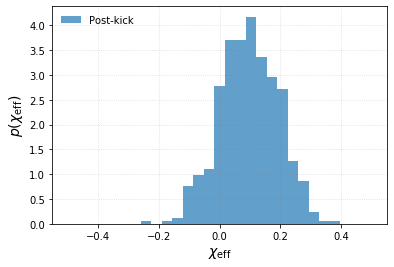

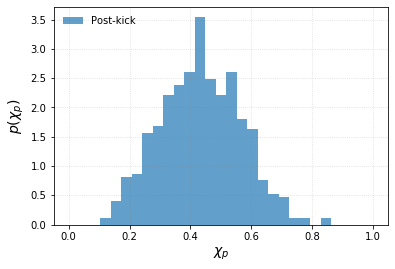

In [15]:
fig,ax = plt.subplots()
ax.hist(chi_eff_final,bins=np.linspace(-0.5,0.5,30),alpha=0.7,density=True,label='Post-kick')
ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=14)
ax.set_ylabel(r'$p(\chi_\mathrm{eff})$',fontsize=14)
ax.xaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)
ax.yaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)
plt.legend(loc='upper left',frameon=False)
plt.show()

fig,ax = plt.subplots()
ax.hist(chi_p_final,bins=np.linspace(0,1.,30),alpha=0.7,density=True,label='Post-kick')
ax.set_xlabel(r'$\chi_p$',fontsize=14)
ax.set_ylabel(r'$p(\chi_p)$',fontsize=14)
ax.xaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)
ax.yaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)
plt.legend(loc='upper left',frameon=False)
plt.show()

In [1036]:
chi_p_initial = np.array([])
chi_eff_initial = np.array([])
chi_p_final = np.array([])
chi_eff_final = np.array([])
bound = np.array([])
tMerge = np.array([])
semi_a = np.array([])
ecc = np.array([])

ref = binary(30,30,0.,0.45,0.,0.,0.,0.,20.*Rsun)
v_parallel = 1.*ref.v_orb()
v_perp = 0.7*ref.v_orb()
prompt_time = 0.03*ref.time_to_merger()
print(v_parallel,v_perp,np.log10(prompt_time/year))

mMin = 5.
mMax = 60.
bq = 4.

for i in range(4000):

    t1 = 10
    while (t1<-np.pi) or (t1>np.pi):
        t1 = np.random.normal(loc=0,scale=0.3)
        
    t2 = 10
    while (t2<-np.pi) or (t2>np.pi):
        t2 = np.random.normal(loc=0,scale=0.3)
        
    phi1 = 2.*np.pi*np.random.random()
    phi2 = 2.*np.pi*np.random.random()
    
    a1 = 0.
    a2 = 0.6 + 0.1*np.random.random()
    sep = 10.**(1.+1.*np.random.random())
    
    m1 = mMin*np.power(mMax/mMin,np.random.random())
    m2 = np.power((m1**(1.+bq)-mMin**(1.+bq))*np.random.random()+mMin**(1.+bq),1./(1.+bq))
    
    test = binary(m1,m2,a1,a2,t1,t2,phi1,phi2,sep*Rsun)
    chi_eff_initial = np.append(chi_eff_initial,test.chi_effective())
    chi_p_initial = np.append(chi_p_initial,test.chi_p())
    
    survived = test.kick(random_special_kick(v_parallel/1e3,v_perp/1e3),1)
    bound = np.append(bound,survived)
    
    chi_eff_final = np.append(chi_eff_final,test.chi_effective())
    chi_p_final = np.append(chi_p_final,test.chi_p())
    tMerge = np.append(tMerge,test.time_to_merger())
    
    semi_a = np.append(semi_a,test.semi_a)
    ecc = np.append(ecc,test.eccentricity)
    
survived = (bound==1)
willMerge = (tMerge<=1e10*year)
willMergePromptly = (tMerge<=prompt_time)

754225.2410823404 527957.6687576382 7.136384481280984


/cvmfs/ligo-containers.opensciencegrid.org/lscsoft/conda/latest/envs/ligo-py36/lib/python3.6/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in less_equal
/cvmfs/ligo-containers.opensciencegrid.org/lscsoft/conda/latest/envs/ligo-py36/lib/python3.6/site-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in less_equal


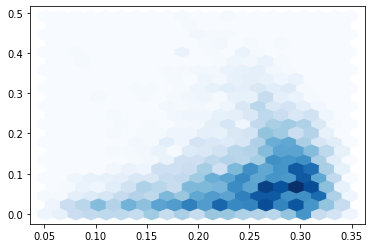

In [887]:
plt.hexbin(chi_eff_initial,chi_p_initial,gridsize=20,cmap='Blues')

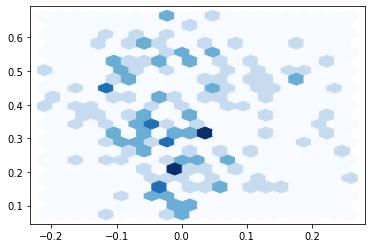

In [888]:
plt.hexbin(chi_eff_final[survived],chi_p_final[survived],gridsize=20,cmap='Blues')

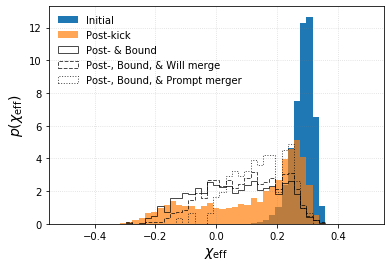

In [1037]:
fig,ax = plt.subplots()

ax.hist(chi_eff_initial,bins=np.linspace(-0.5,0.5,50),density=True,label='Initial')
ax.hist(chi_eff_final,bins=np.linspace(-0.5,0.5,50),alpha=0.7,density=True,label='Post-kick')
ax.hist(chi_eff_final[survived],bins=np.linspace(-0.5,0.5,50),alpha=0.7,histtype='step',color='black',density=True,label='Post- & Bound')
ax.hist(chi_eff_final[survived*willMerge],bins=np.linspace(-0.5,0.5,50),alpha=0.7,histtype='step',ls='--',color='black',density=True,label='Post-, Bound, & Will merge')
ax.hist(chi_eff_final[survived*willMergePromptly],bins=np.linspace(-0.5,0.5,50),alpha=0.7,histtype='step',ls=':',color='black',density=True,label='Post-, Bound, & Prompt merger')

ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=14)
ax.set_ylabel(r'$p(\chi_\mathrm{eff})$',fontsize=14)
ax.xaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)
ax.yaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)

plt.legend(loc='upper left',frameon=False)

plt.show()

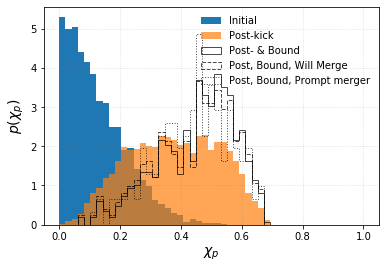

In [1038]:
fig,ax = plt.subplots()

ax.hist(chi_p_initial,bins=np.linspace(0,1,50),density=True,label='Initial')
ax.hist(chi_p_final,bins=np.linspace(0,1,50),alpha=0.7,density=True,label='Post-kick')
ax.hist(chi_p_final[survived],bins=np.linspace(0,1,50),alpha=0.7,histtype='step',color='black',density=True,label='Post- & Bound')
ax.hist(chi_p_final[survived*willMerge],bins=np.linspace(0,1,50),alpha=0.7,histtype='step',ls='--',color='black',density=True,label='Post, Bound, Will Merge')
ax.hist(chi_p_final[survived*willMergePromptly],bins=np.linspace(0,1,50),alpha=0.7,histtype='step',ls=':',color='black',density=True,label='Post, Bound, Prompt merger')

ax.set_xlabel(r'$\chi_p$',fontsize=14)
ax.set_ylabel(r'$p(\chi_p)$',fontsize=14)
ax.xaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)
ax.yaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)

plt.legend(loc='upper right',frameon=False)

plt.show()

In [1039]:
print(len(chi_eff_final[survived]))
print(len(chi_eff_final[survived*willMerge]))
print(len(chi_eff_final[survived*willMergePromptly]))

726
598
151


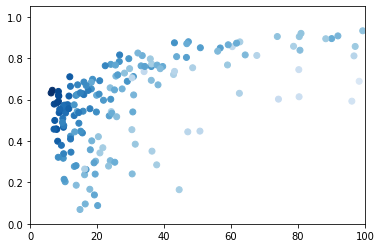

In [900]:
fig,ax = plt.subplots()
ax.scatter(semi_a/Rsun,ecc,c=np.log10(tMerge/year),cmap='Blues_r')
ax.set_xlim(0,100)
ax.set_ylim(0,1.05)
plt.show()

(array([ 1.,  4., 18., 29., 43., 55., 67., 70., 87., 62., 73., 44., 48.,
        39., 33., 24., 16.,  7.,  2.,  2.]),
 array([ 4.62927642,  5.04391251,  5.45854861,  5.8731847 ,  6.28782079,
         6.70245689,  7.11709298,  7.53172908,  7.94636517,  8.36100126,
         8.77563736,  9.19027345,  9.60490955, 10.01954564, 10.43418173,
        10.84881783, 11.26345392, 11.67809002, 12.09272611, 12.5073622 ,
        12.9219983 ]),
 <a list of 20 Patch objects>)

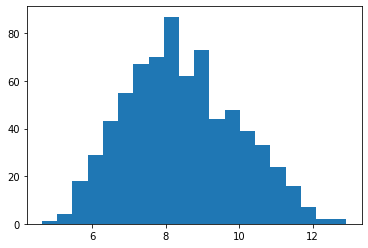

In [1040]:
plt.hist(np.log10(tMerge[tMerge==tMerge]/year),bins=20)

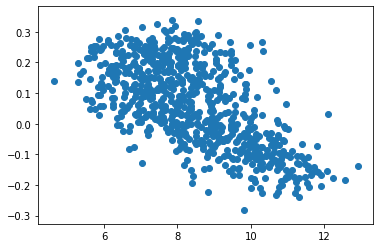

In [1042]:
fig,ax = plt.subplots()
ax.scatter(np.log10(tMerge[tMerge==tMerge]/year),chi_eff_final[tMerge==tMerge])
plt.show()

In [956]:
t_start = time.time()

chi_p_final = np.array([])
chi_eff_final = np.array([])
tMerge = np.array([])
semi_a = np.array([])
ecc = np.array([])

ref = binary(30,30,0.,0.45,0.,0.,0.,0.,10.*Rsun)
v_parallel = 0.9*ref.v_orb()
v_perp = 0.75*ref.v_orb()
prompt_time = 0.03*ref.time_to_merger()
print(v_parallel,v_perp)

while len(chi_eff_final)<500:

    t1 = 10
    while (t1<-np.pi) or (t1>np.pi):
        t1 = np.random.normal(loc=0,scale=0.3)
        
    t2 = 10
    while (t2<-np.pi) or (t2>np.pi):
        t2 = np.random.normal(loc=0,scale=0.3)
        
    phi1 = 2.*np.pi*np.random.random()
    phi2 = 2.*np.pi*np.random.random()
    
    a1 = 0.
    a2 = 0.4 + 0.1*np.random.random()
    sep = 10.**(1.+1.5*np.random.random())
    
    test = binary(30,30,a1,a2,t1,t2,phi1,phi2,sep*Rsun)
    chi_eff_initial = np.append(chi_eff_initial,test.chi_effective())
    chi_p_initial = np.append(chi_p_initial,test.chi_p())
    
    survived = test.kick(random_special_kick(v_parallel/1e3,v_perp/1e3),1)
    tm = test.time_to_merger()/1e9/year
    
    if survived and (tm<=1):
    
        tMerge = np.append(tMerge,tm)
        chi_eff_final = np.append(chi_eff_final,test.chi_effective())
        chi_p_final = np.append(chi_p_final,test.chi_p())    
        semi_a = np.append(semi_a,test.semi_a)
        ecc = np.append(ecc,test.eccentricity)
        
kde_chiEff = gaussian_kde(chi_eff_final)
kde_chiP = gaussian_kde(chi_p_final)

t_stop = time.time()
print(t_stop-t_start)

853308.4520182103 959972.0085204866
9.191261529922485


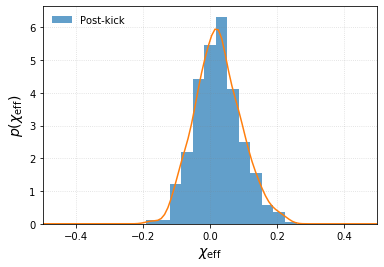

In [878]:
fig,ax = plt.subplots()

grid = np.linspace(-1,1,200)

ax.hist(chi_eff_final,bins=np.linspace(-0.5,0.5,30),alpha=0.7,density=True,label='Post-kick')
ax.plot(grid,kde_chiEff(grid))
ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=14)
ax.set_ylabel(r'$p(\chi_\mathrm{eff})$',fontsize=14)
ax.xaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)
ax.yaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)

plt.legend(loc='upper left',frameon=False)
ax.set_xlim(-0.5,0.5)

plt.show()

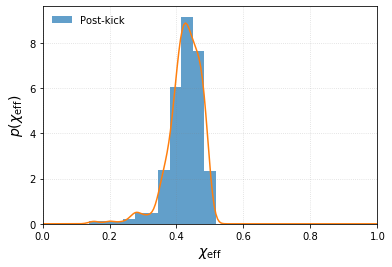

In [879]:
fig,ax = plt.subplots()

grid = np.linspace(0,1,200)

ax.hist(chi_p_final,bins=np.linspace(0,1,30),alpha=0.7,density=True,label='Post-kick')
ax.plot(grid,kde_chiP(grid))
ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=14)
ax.set_ylabel(r'$p(\chi_\mathrm{eff})$',fontsize=14)
ax.xaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)
ax.yaxis.grid(True,which='major',ls=':',color='grey',alpha=0.3)

plt.legend(loc='upper left',frameon=False)
ax.set_xlim(0,1)

plt.show()